# Data Part

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
noise_2018=pd.read_csv('/content/drive/MyDrive/finals/noise_data/san_salvario_2018.csv',skiprows=[0,1,2,3,4,5,6,7],delimiter=';')
df=pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/Noise_weather_wifi_sim_holidays.csv')
#Converting to date time
df['date_hour']=pd.to_datetime(df['date_hour'])
df=df.drop(columns=['Unnamed: 0','C1','C2','C3','C4','C5,,,,,','date','Day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17311 entries, 0 to 17310
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date_hour           17311 non-null  datetime64[ns]
 1   No. of Visitors     1639 non-null   float64       
 2   index               9054 non-null   float64       
 3   cluster             9054 non-null   object        
 4   data_a              9054 non-null   object        
 5   numero_presenze     9054 non-null   float64       
 6   layer_id            9054 non-null   object        
 7   layer_nome          9054 non-null   object        
 8   dettaglio(secondi)  9054 non-null   float64       
 9   temp                17311 non-null  float64       
 10  winds               2261 non-null   float64       
 11  rainfall_mm         17098 non-null  float64       
 12  snowfall_mm         17100 non-null  float64       
 13  Holiday             1382 non-null   object    

In [ ]:
df['date']=df['date_hour'].dt.date
df['hour']=df['date_hour'].dt.hour
df['day']=df['date_hour'].dt.dayofweek
df.head(2)

,date_hour,No. of Visitors,index,cluster,data_a,numero_presenze,layer_id,layer_nome,dettaglio(secondi),temp,winds,rainfall_mm,snowfall_mm,Holiday,isHoliday,date,hour,day
0,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.04,0.366667,-0.010,2.6,New year's Day,1,2018-01-01,0,0
1,2018-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.09,0.590000,0.009,2.6,New year's Day,1,2018-01-01,1,0


In [ ]:
set(df['day'])

{0, 1, 2, 3, 4, 5, 6}

In [ ]:
noise_2018.head(2)

,Data,Ora,C1,C2,C3,C4,C5
0,01-01-2018,00:00,"68,7",NaN,"76,0",NaN,"66,6"
1,01-01-2018,01:00,"68,3",NaN,"68,2",NaN,"65,4"


In [ ]:
noise1=noise_2018.copy()
noise1['Ora']=pd.to_datetime(noise1['Ora']).dt.hour
noise1['Data']=pd.to_datetime(noise1['Data']).dt.date

In [ ]:
#Converting the noise readings into decimal format
noise1['C1']=noise1['C1'].apply(lambda x: str(x).replace(',','.'))
noise1['C2']=noise1['C2'].apply(lambda x: str(x).replace(',','.'))
noise1['C3']=noise1['C3'].apply(lambda x: str(x).replace(',','.'))
noise1['C4']=noise1['C4'].apply(lambda x: str(x).replace(',','.'))
noise1['C5']=noise1['C5'].apply(lambda x: str(x).replace(',','.'))
#Conerting the noise reading to float values
noise1['C1']=noise1['C1'].apply(lambda x: float(x))
noise1['C2']=noise1['C2'].apply(lambda x: float(x))
noise1['C3']=noise1['C3'].apply(lambda x: float(x))
noise1['C4']=noise1['C4'].apply(lambda x: float(x))
noise1['C5']=noise1['C5'].apply(lambda x: float(x))
noise1.head(2)

,Data,Ora,C1,C2,C3,C4,C5
0,2018-01-01,0,68.7,NaN,76.0,NaN,66.6
1,2018-01-01,1,68.3,NaN,68.2,NaN,65.4


In [ ]:
new_df = pd.merge(noise1, df,  how='inner', left_on=['Data','Ora'], right_on = ['date','hour'])
new_df.head()

,Data,Ora,C1,C2,C3,C4,C5,date_hour,No. of Visitors,index,cluster,data_a,numero_presenze,layer_id,layer_nome,dettaglio(secondi),temp,winds,rainfall_mm,snowfall_mm,Holiday,isHoliday,date,hour,day
0,2018-01-01,0,68.7,NaN,76.0,NaN,66.6,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.04,0.366667,-0.010,2.600000,New year's Day,1,2018-01-01,0,0
1,2018-01-01,1,68.3,NaN,68.2,NaN,65.4,2018-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.09,0.590000,0.009,2.600000,New year's Day,1,2018-01-01,1,0
2,2018-01-01,2,59.8,NaN,64.4,NaN,64.4,2018-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.05,0.450000,0.008,2.266667,New year's Day,1,2018-01-01,2,0
3,2018-01-01,3,67.4,NaN,67.5,NaN,61.8,2018-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.89,0.400000,0.006,2.266667,New year's Day,1,2018-01-01,3,0
4,2018-01-01,4,68.0,NaN,64.5,NaN,60.5,2018-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.73,0.780000,-0.011,2.300000,New year's Day,1,2018-01-01,4,0


In [ ]:
new_df.columns

Index(['Data', 'Ora', 'C1', 'C2', 'C3', 'C4', 'C5', 'date_hour',
       'No. of Visitors', 'index', 'cluster', 'data_a', 'numero_presenze',
       'layer_id', 'layer_nome', 'dettaglio(secondi)', 'temp', 'winds',
       'rainfall_mm', 'snowfall_mm', 'Holiday', 'isHoliday', 'date', 'hour',
       'day'],
      dtype='object')

In [ ]:
new_df=new_df.drop(columns=['Data','Ora'])

In [ ]:
#Fillig the null values considering means on hourly basis
new_df["C1"] = new_df.groupby(["hour",'day'])['C1'].transform(lambda x: x.fillna(round(x.mean(),1)))
new_df["C2"] = new_df.groupby(["hour",'day'])['C2'].transform(lambda x: x.fillna(round(x.mean(),1)))
new_df["C3"] = new_df.groupby(["hour",'day'])['C3'].transform(lambda x: x.fillna(round(x.mean(),1)))
new_df["C4"] = new_df.groupby(["hour",'day'])['C4'].transform(lambda x: x.fillna(round(x.mean(),1)))
new_df["C5"] = new_df.groupby(["hour",'day'])['C5'].transform(lambda x: x.fillna(round(x.mean(),1)))

In [ ]:
new_df.head(2)

,C1,C2,C3,C4,C5,date_hour,No. of Visitors,index,cluster,data_a,numero_presenze,layer_id,layer_nome,dettaglio(secondi),temp,winds,rainfall_mm,snowfall_mm,Holiday,isHoliday,date,hour,day,Log_Avg
0,68.7,56.6,76.0,58.8,66.6,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.04,0.366667,-0.010,2.6,New year's Day,1,2018-01-01,0,0,70.253908
1,68.3,53.4,68.2,55.4,65.4,2018-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.09,0.590000,0.009,2.6,New year's Day,1,2018-01-01,1,0,65.415954


In [ ]:
new_df.isnull().sum()

C1                        0
C2                        0
C3                        0
C4                        0
C5                        0
date_hour                 0
No. of Visitors       15672
index                  8257
cluster                8257
data_a                 8257
numero_presenze        8257
layer_id               8257
layer_nome             8257
dettaglio(secondi)     8257
temp                      0
winds                 15050
rainfall_mm             213
snowfall_mm             211
Holiday               15929
isHoliday                 0
date                      0
hour                      0
day                       0
dtype: int64

In [ ]:
#logarithmic average of the values.
#Divide each value by 10
#Apply anti log
#Add all the values
#Divide by total number of samples
#base 10 log the number and multiply it by 10
#df['C1_new']=new_df['C1'].apply(lambda x: 10**(x/10))
#df['C2_new']=new_df['C2'].apply(lambda x: 10**(x/10))
#df['C3_new']=new_df['C3'].apply(lambda x: 10**(x/10))
#df['C4_new']=new_df['C4'].apply(lambda x: 10**(x/10))
#df['C5_new']=new_df['C5'].apply(lambda x: 10**(x/10))

In [ ]:
#x1=df['C1_new'].mean()
#x2=df['C2_new'].mean()
#x3=df['C3_new'].mean()
#x4=df['C4_new'].mean()
#x5=df['C5_new'].mean()

In [ ]:
import math
#c1_log_mean=10*math.log10(x1)
#c2_log_mean=10*math.log10(x2)
#c3_log_mean=10*math.log10(x3)
#c4_log_mean=10*math.log10(x4)
#c5_log_mean=10*math.log10(x5)

In [ ]:
#new_df['C1'].fillna(round(c1_log_mean,1),inplace=True)
#new_df['C2'].fillna(round(c2_log_mean,1),inplace=True)
#new_df['C3'].fillna(round(c3_log_mean,1),inplace=True)
#new_df['C4'].fillna(round(c4_log_mean,1),inplace=True)
#new_df['C5'].fillna(round(c5_log_mean,1),inplace=True)

In [ ]:
#logarithmic average of the values.
#Divide each value by 10
#Apply anti log
#Add all the values
#Divide by total number of samples
#base 10 log the number and multiply it by 10
new_df['Log_Avg']=np.log10(((10**(new_df['C1']/10))+(10**(new_df['C2']/10))+(10**(new_df['C3']/10))+(10**(new_df['C4']/10))+(10**(new_df['C5']/10)))/5)*10

In [ ]:
new_df.head(2)

,C1,C2,C3,C4,C5,date_hour,No. of Visitors,index,cluster,data_a,numero_presenze,layer_id,layer_nome,dettaglio(secondi),temp,winds,rainfall_mm,snowfall_mm,Holiday,isHoliday,date,hour,day,Log_Avg
0,68.7,56.6,76.0,58.8,66.6,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.04,0.366667,-0.010,2.6,New year's Day,1,2018-01-01,0,0,70.253908
1,68.3,53.4,68.2,55.4,65.4,2018-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.09,0.590000,0.009,2.6,New year's Day,1,2018-01-01,1,0,65.415954


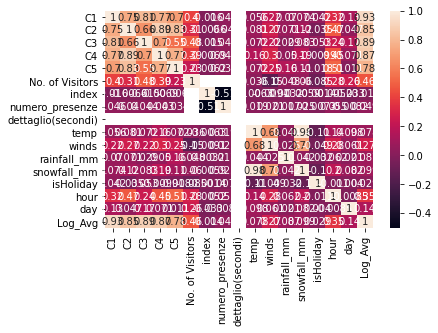

In [ ]:
correlation_mat = new_df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [ ]:
corr_pairs = correlation_mat.unstack()
print(corr_pairs)

C1       C1             1.000000
         C2             0.750641
         C3             0.811255
         C4             0.774808
         C5             0.704784
                          ...   
Log_Avg  snowfall_mm    0.099318
         isHoliday      0.029025
         hour           0.353521
         day            0.144505
         Log_Avg        1.000000
Length: 289, dtype: float64


In [ ]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
strong_pairs

index            numero_presenze   -0.505284
numero_presenze  index             -0.505284
hour             C5                 0.508634
C5               hour               0.508634
C3               C5                 0.545041
C5               C3                 0.545041
C3               C2                 0.664572
C2               C3                 0.664572
temp             winds              0.680332
winds            temp               0.680332
C3               C4                 0.703664
C4               C3                 0.703664
C1               C5                 0.704784
C5               C1                 0.704784
snowfall_mm      winds              0.707306
winds            snowfall_mm        0.707306
C1               C2                 0.750641
C2               C1                 0.750641
C5               C4                 0.770329
C4               C5                 0.770329
                 C1                 0.774808
C1               C4                 0.774808
Log_Avg   

# Analysing by Dropping Null Values

In [66]:
new_df['data_a']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
17306    NaN
17307    NaN
17308    NaN
17309    NaN
17310    NaN
Name: data_a, Length: 17311, dtype: object